In [4]:
import pandas as pd
# https://scikit-learn.org/stable/modules/classes.html

In [5]:
traindata = pd.read_csv('/Users/camillecu/Downloads/KUL/AdvancedAnalytic/AdvancedAnalytics_Assignments/Assignment1/data/train.csv')


In [6]:
traindata

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,...,Tariff_OK,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,high Dropped calls,No Usage,target,id
0,F,50.0,20/05/98,29.200000,2.0,Play 100,BS210,62.0,153.000000,185.0,...,OK,0.150531,0.246536,0.706735,0.046729,0.203034,F,F,0,K262360
1,M,25.0,16/12/96,46.533333,1.0,CAT 100,ASAD90,146.0,718.800000,98.0,...,OK,0.188988,0.780710,0.178886,0.040404,0.273249,F,F,1,K170160
2,F,46.0,27/08/97,38.066667,1.0,CAT 50,WC95,160.0,322.800000,7.0,...,OK,0.239300,0.722633,0.277367,0.000000,0.205025,F,F,0,K331610
3,F,59.0,13/07/98,27.400000,1.0,CAT 50,BS110,84.0,317.400001,57.0,...,OK,0.221467,0.662492,0.337508,0.000000,0.050090,F,F,0,K332460
4,F,25.0,08/01/99,21.433333,1.0,Play 300,WC95,14.0,309.600000,326.0,...,OK,0.107509,0.321896,0.663132,0.014972,0.090509,F,F,0,K394220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,F,16.0,15/09/97,37.433333,2.0,CAT 200,ASAD90,151.0,1169.400001,201.0,...,OK,0.130433,0.615895,0.346500,0.037605,0.127974,F,F,1,K192650
5040,F,29.0,28/09/96,49.166667,1.0,CAT 100,CAS30,135.0,405.600000,124.0,...,OK,0.189112,0.555769,0.412716,0.031515,0.238615,F,F,1,K295600
5041,M,23.0,08/06/99,16.400000,0.0,CAT 200,BS110,566.0,2382.000000,4.0,...,OK,0.112657,0.810121,0.162330,0.027548,0.043094,F,F,0,K366420
5042,M,46.0,01/03/98,31.866667,2.0,Play 100,S50,72.0,112.200000,31.0,...,OK,0.205957,0.323250,0.664650,0.012100,0.171451,F,F,1,K219850


## missing values

In [7]:
# show rows that contain missing data
missing_data_rows = traindata[traindata.isnull().any(axis=1)]
missing_data_rows


,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,...,Tariff_OK,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,high Dropped calls,No Usage,target,id
1736,F,48.0,26/07/98,26.966667,2.0,Play 100,BS110,0.0,0.0,0.0,...,OK,0.5,0.0,0.0,0.0,0.0,F,T,0,K244380
3237,F,34.0,22/03/97,43.333333,2.0,Play 100,BS110,0.0,0.0,0.0,...,OK,0.5,0.0,0.0,0.0,0.0,F,T,0,K244320
3836,M,21.0,03/01/96,58.133333,2.0,Play 100,CAS30,0.0,0.0,0.0,...,OK,0.5,0.0,0.0,0.0,0.0,F,T,1,K213590
4301,F,22.0,08/08/98,26.533333,5.0,Play 100,CAS30,0.0,0.0,0.0,...,OK,0.5,0.0,0.0,0.0,0.0,F,T,1,K212820


In [8]:
# show exact columns contains missing data
missing_data_columns = traindata.columns[traindata.isnull().any()].tolist()
missing_data_columns 

['Dropped_calls_ratio', 'Usage_Band', 'call_cost_per_min']

In [9]:
# print the type of the columns that contain missing data
traindata[missing_data_columns].dtypes

Dropped_calls_ratio    float64
Usage_Band              object
call_cost_per_min      float64
dtype: object

- impute missing values in numeric column with medians
- impute missing values in categorical variable with mode was used, thus replacing NAs with the most common category among all
traindata['Dropped_calls_ratio'] = traindata['Dropped_calls_ratio'].fillna(traindata['Dropped_calls_ratio'].median())
traindata['call_cost_per_min'] = traindata['call_cost_per_min'].fillna(traindata['call_cost_per_min'].median())
traindata['Usage_Band'] = traindata['Usage_Band'].fillna(traindata['Usage_Band'].mode().iloc[0])


In [10]:
# create a subset of traindata which contains only target column
target = traindata['target']
# drop the target column from traindata
traindata = traindata.drop(columns=['target'])

In [11]:
traindata['Usage_Band'] = traindata['Usage_Band'].fillna(traindata['Usage_Band'].mode().iloc[0])

# impute using KNN only numerical columns

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=7, weights="distance")

traindata_numeric = traindata.select_dtypes(include=['int64', 'float64'])
traindata_imputed = imputer.fit_transform(traindata_numeric)
traindata_imputed = pd.DataFrame(traindata_imputed, columns=traindata_numeric.columns)
traindata_imputed


,Age,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,...,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio
0,50.0,29.200000,2.0,62.0,153.000000,185.0,438.600001,4.0,29.000000,126.002615,...,20.600001,9.930712,2.045727,52.446773,112.386773,0.150531,0.246536,0.706735,0.046729,0.203034
1,25.0,46.533333,1.0,146.0,718.800000,98.0,164.700000,4.0,37.200000,251.580636,...,320.700000,12.807103,41.072380,116.546571,221.546571,0.188988,0.780710,0.178886,0.040404,0.273249
2,46.0,38.066667,1.0,160.0,322.800000,7.0,123.900000,0.0,0.000000,91.584877,...,146.700000,12.226326,17.936021,45.411484,128.811484,0.239300,0.722633,0.277367,0.000000,0.205025
3,59.0,27.400000,1.0,84.0,317.400001,57.0,161.699999,0.0,0.000000,23.998036,...,179.100000,11.624922,20.820235,28.019646,111.419646,0.221467,0.662492,0.337508,0.000000,0.050090
4,25.0,21.433333,1.0,14.0,309.600000,326.0,637.800000,6.0,14.400000,87.051515,...,-838.200000,9.403618,0.000000,34.820606,112.760606,0.107509,0.321896,0.663132,0.014972,0.090509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,16.0,37.433333,2.0,151.0,1169.400001,201.0,657.900000,34.0,71.400001,242.983418,...,698.700002,8.079475,56.451295,129.346320,279.346320,0.130433,0.615895,0.346500,0.037605,0.127974
5040,29.0,49.166667,1.0,135.0,405.600000,124.0,301.200001,11.0,23.000000,174.140881,...,129.800001,10.557687,13.703878,65.946142,170.946142,0.189112,0.555769,0.412716,0.031515,0.238615
5041,23.0,16.400000,0.0,566.0,2382.000000,4.0,477.300000,13.0,81.000000,126.710085,...,1740.300000,9.050607,157.507715,195.520741,345.520741,0.112657,0.810121,0.162330,0.027548,0.043094
5042,46.0,31.866667,2.0,72.0,112.200000,31.0,230.700000,2.0,4.200000,59.510484,...,-252.900000,11.464996,0.000000,23.804194,83.744194,0.205957,0.323250,0.664650,0.012100,0.171451


In [12]:
traindata_imputed.columns

Index(['Age', 'L_O_S', 'Dropped_Calls', 'Peak_calls_Sum', 'Peak_mins_Sum',
       'OffPeak_calls_Sum', 'OffPeak_mins_Sum', 'Weekend_calls_Sum',
       'Weekend_mins_Sum', 'International_mins_Sum', 'Nat_call_cost_Sum',
       'AvePeak', 'AveOffPeak', 'AveWeekend', 'National_calls',
       'National mins', 'AveNational', 'All_calls_mins', 'Dropped_calls_ratio',
       'Mins_charge', 'call_cost_per_min', 'actual call cost',
       'Total_call_cost', 'Total_Cost', 'average cost min', 'Peak ratio',
       'OffPeak ratio', 'Weekend ratio', 'Nat-InterNat Ratio'],
      dtype='object')

In [13]:
# detect if traindata_imputed has missing data
traindata_imputed.columns[traindata_imputed.isnull().any()].tolist()

[]

In [14]:
# replace numerical columns in traindata with the same column in traindata_imputed
traindata[traindata_numeric.columns] = traindata_imputed

##  outliers
### ways to detect outliers
Numerical Variables: Z-Score / IQR  / Visualization

Categorical Variables: Frequency Counts

Mixed Variables: Clustering / Isolation Forest

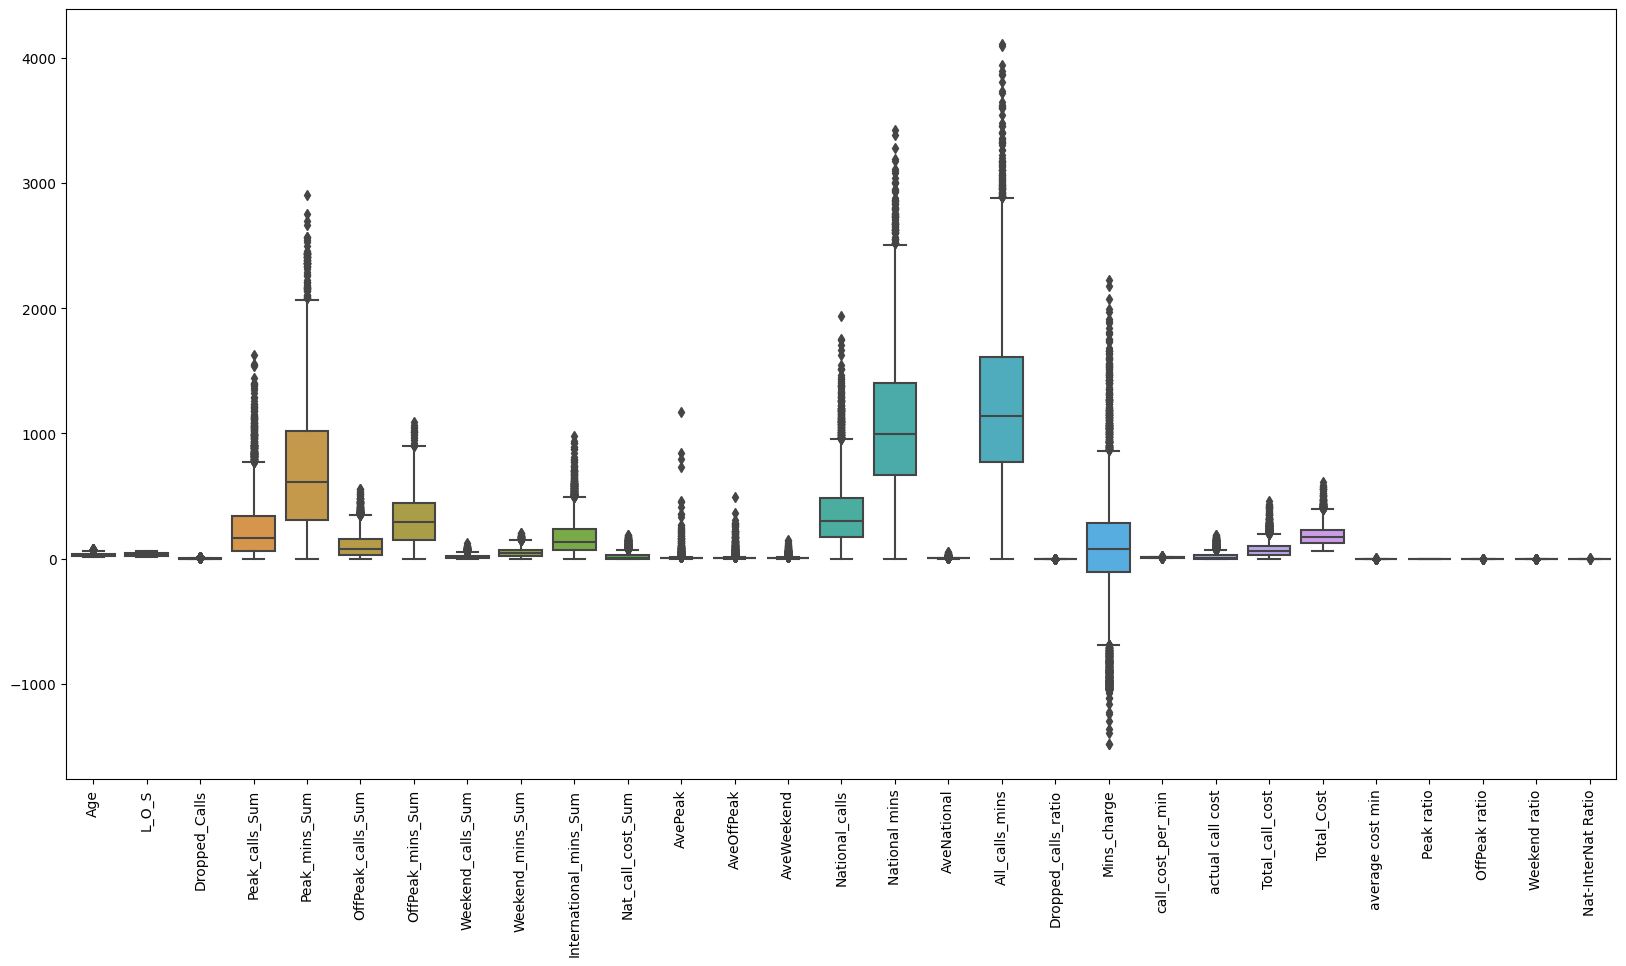

In [15]:
# create box Plot of all numeric columns and display them together
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.boxplot(data=traindata_imputed)
plt.xticks(rotation=90)
plt.show()

    

##### we might need to transform those numerical variables so that they are gausian distributed since some models are sensitive to outliers

## Encode categorical variables
https://contrib.scikit-learn.org/category_encoders/

In [16]:
# List all the columns in the traindata that are of type object (text string) or category
categorical_text_columns = traindata.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_text_columns)

['Gender', 'Connect_Date', 'tariff', 'Handset', 'Usage_Band', 'Tariff_OK', 'high Dropped calls', 'No Usage', 'id']


In [17]:
# Print the unique values of the 'Usage_Band', 'high Dropped calls', 'No Usage', 'tariff', 'Handset', and 'Tariff_OK' columns in the 'traindata' DataFrame
print("Unique values in 'Gender':", traindata['Gender'].unique())
# Print the first row of 'Connect_Date'
print("First row of 'Connect_Date':", traindata['Connect_Date'].iloc[0])
print("Unique values in 'tariff':", traindata['tariff'].unique())
print("Unique values in 'Handset':", traindata['Handset'].unique())
print("Unique values in 'Usage_Band':", traindata['Usage_Band'].unique())
print("Unique values in 'Tariff_OK':", traindata['Tariff_OK'].unique())
print("Unique values in 'high Dropped calls':", traindata['high Dropped calls'].unique())
print("Unique values in 'No Usage':", traindata['No Usage'].unique())


Unique values in 'Gender': ['F' 'M']
First row of 'Connect_Date': 20/05/98
Unique values in 'tariff': ['Play 100' 'CAT 100' 'CAT 50' 'Play 300' 'CAT 200']
Unique values in 'Handset': ['BS210' 'ASAD90' 'WC95' 'BS110' 'S50' 'S80' 'CAS30' 'CAS60' 'ASAD170'
 'SOP10' 'SOP20']
Unique values in 'Usage_Band': ['Med' 'MedLow' 'MedHigh' 'High' 'Low']
Unique values in 'Tariff_OK': ['OK' 'High CAT 100' 'High CAT 50' 'High Play 100']
Unique values in 'high Dropped calls': ['F' 'T']
Unique values in 'No Usage': ['F' 'T']


In [18]:
#encode Gender column
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Transform the 'Gender' column in the 'traindata' DataFrame. F to 0 and M to 1
traindata['Gender'] = label_encoder.fit_transform(traindata['Gender'])

# Convert 'Connect_Date' to datetime format
traindata['Connect_Date'] = pd.to_datetime(traindata['Connect_Date'])
# Subtract the minimum date from all the dates in the 'Connect_Date' column and add 1
traindata['Connect_Date'] = (traindata['Connect_Date'] - traindata['Connect_Date'].min()).dt.days + 1

#encode Usage_Band column
usage_band_mapping = {'Low': 1, 'MedLow': 2, 'Med': 3, 'MedHigh': 4, 'High': 5}
# Apply the mapping to the 'Usage_Band' column
traindata['Usage_Band'] = traindata['Usage_Band'].map(usage_band_mapping)


# Use the LabelEncoder that's already defined to encode the 'high Dropped calls' column in X_train
traindata['high Dropped calls'] = label_encoder.fit_transform(traindata['high Dropped calls'])

traindata['No Usage'] = label_encoder.fit_transform(traindata['No Usage'])

#'OK' 'High CAT 100' 'High CAT 50' 'High Play 100'
tariffOK_mapping = {'OK': 1, 'High CAT 100': 0, 'High CAT 50': 0, 'High Play 100': 0}
traindata['Tariff_OK'] = traindata['Tariff_OK'].map(tariffOK_mapping)

# drop column id
traindata = traindata.drop('id', axis=1)





/var/folders/cv/bbbq9ykj0jg6pt6c7tx5_vjh0000gn/T/ipykernel_45963/442359548.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  traindata['Connect_Date'] = pd.to_datetime(traindata['Connect_Date'])


- Encode 'tariff', 'Handset', 'Tariff_OK' columns with target encoder

from category_encoders import TargetEncoder
target_encoder = TargetEncoder()
traindata['tariff'] = target_encoder.fit_transform(X_train['tariff'])
traindata['Handset'] = target_encoder.fit_transform(X_train['Handset'])
traindata['Tariff_OK'] = target_encoder.fit_transform(X_train['Tariff_OK'])

cons of target encoder:
data leakage / sensitive to outliers / lost of information / risk of overfitting

In [19]:
# Perform one-hot encoding 
df_encoded = pd.get_dummies(traindata, columns=['tariff', 'Handset'], drop_first=True)

# transform all 'True' values to 1 and 'False' values to 0
df_encoded = df_encoded * 1
df_encoded.shape


(5044, 49)

## Transform highly skewed numerical columns

- box-cox 
- log
- square root
- exponential
- Yeo-Johnson Transformation (similar to box-cox but can handle 0 and negative values)
- quantile_transform (this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.)

Warning Risk of data leak:
Do not use quantile_transform unless you know what you are doing. A common mistake is to apply it to the entire data before splitting into training and test sets. This will bias the model evaluation because information would have leaked from the test set to the training set. In general, we recommend using QuantileTransformer within a Pipeline in order to prevent most risks of data leaking:pipe = make_pipeline(QuantileTransformer(), LogisticRegression()).

- Label Encoded fearures: Since label encoded categorical features are represented by numerical values, they can be scaled along with numerical features. However, as mentioned earlier, label encoding doesn't imply any ordinal relationship between categories, so the scale may not have meaningful interpretations.
- One-Hot Encoded features: One-hot encoded categorical features are already in a binary format (0 or 1) and typically don't require normalization. Each binary variable represents the presence or absence of a category, so their scale is already well-defined.

In [20]:
traindata_imputed = pd.DataFrame(traindata_imputed, columns=traindata_numeric.columns)
traindata_imputed.head()

,Age,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,...,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio
0,50.0,29.200000,2.0,62.0,153.000000,185.0,438.600001,4.0,29.0,126.002615,...,20.600001,9.930712,2.045727,52.446773,112.386773,0.150531,0.246536,0.706735,0.046729,0.203034
1,25.0,46.533333,1.0,146.0,718.800000,98.0,164.700000,4.0,37.2,251.580636,...,320.700000,12.807103,41.072380,116.546571,221.546571,0.188988,0.780710,0.178886,0.040404,0.273249
2,46.0,38.066667,1.0,160.0,322.800000,7.0,123.900000,0.0,0.0,91.584877,...,146.700000,12.226326,17.936021,45.411484,128.811484,0.239300,0.722633,0.277367,0.000000,0.205025
3,59.0,27.400000,1.0,84.0,317.400001,57.0,161.699999,0.0,0.0,23.998036,...,179.100000,11.624922,20.820235,28.019646,111.419646,0.221467,0.662492,0.337508,0.000000,0.050090
4,25.0,21.433333,1.0,14.0,309.600000,326.0,637.800000,6.0,14.4,87.051515,...,-838.200000,9.403618,0.000000,34.820606,112.760606,0.107509,0.321896,0.663132,0.014972,0.090509


In [21]:
traindata_yj = traindata_imputed.copy()

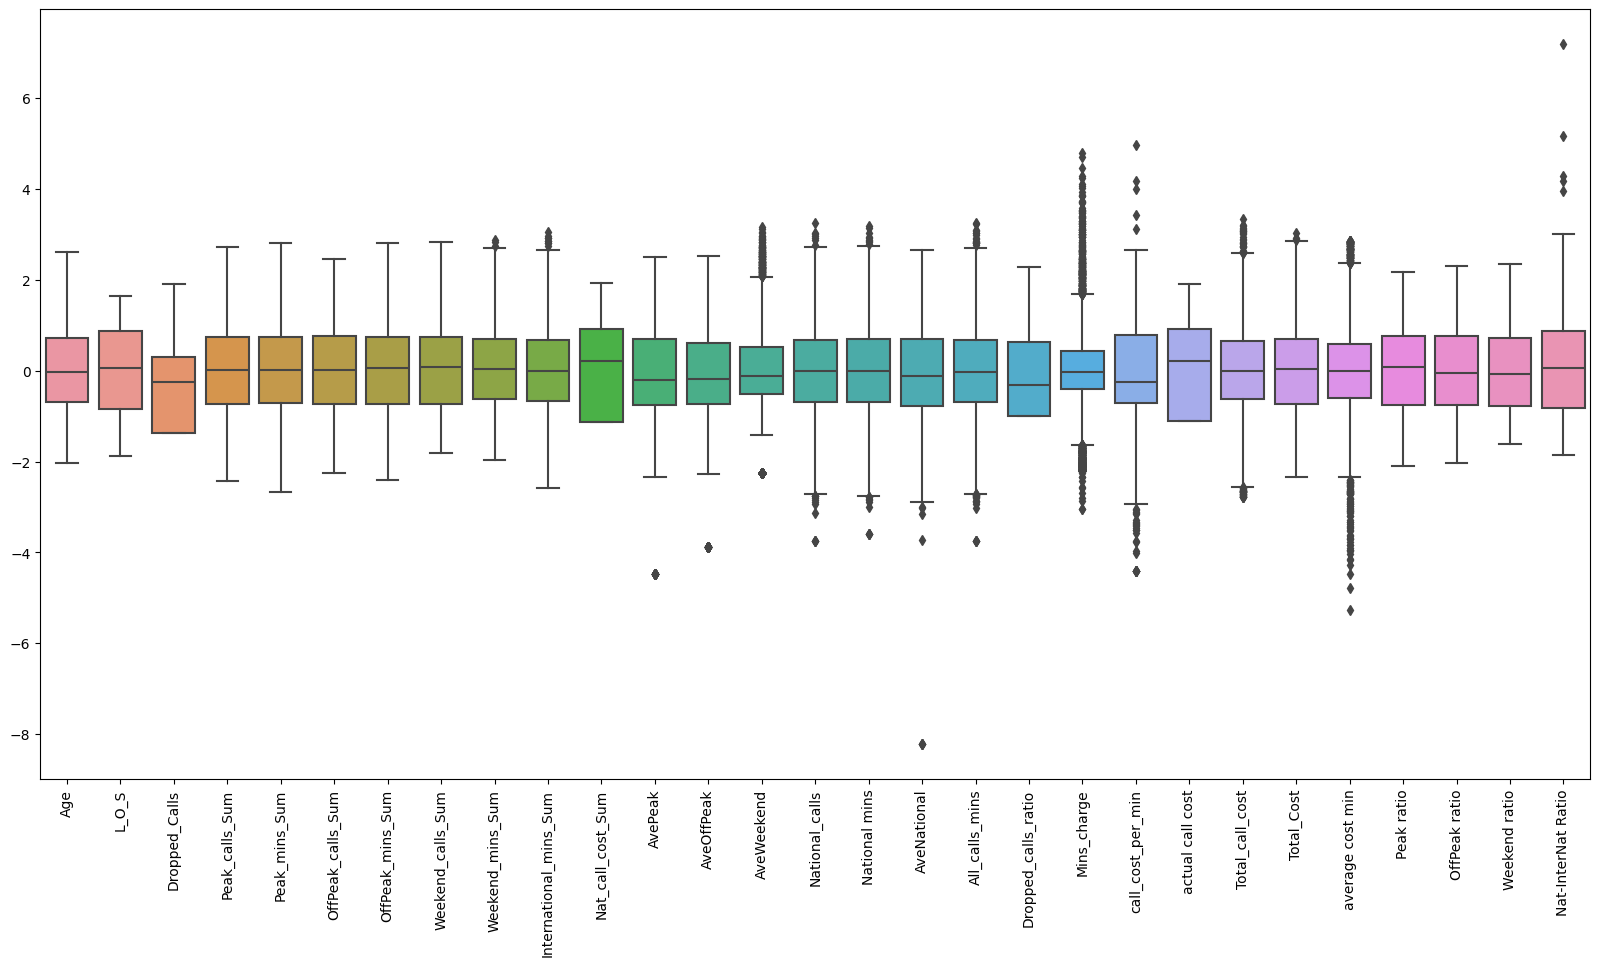

In [22]:
from sklearn.preprocessing import power_transform
traindata_yj = power_transform(traindata_imputed, method='yeo-johnson')
traindata_yj = pd.DataFrame(traindata_yj, columns=traindata_imputed.columns)
plt.figure(figsize=(20, 10))
sns.boxplot(data=traindata_yj)
# x-axis labels should be column names
plt.xticks(rotation=90)
plt.show()

In [23]:
traindata_yj

,Age,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,Weekend_mins_Sum,International_mins_Sum,...,Mins_charge,call_cost_per_min,actual call cost,Total_call_cost,Total_Cost,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio
0,1.355744,-0.252648,0.310113,-0.701966,-1.273821,0.966948,0.707612,-0.741518,-0.416391,-0.049893,...,-0.142528,-0.051247,-0.417395,-0.128097,-0.955850,-0.118000,-1.514155,1.590882,0.003655,0.491438
1,-0.375707,0.919944,-0.238286,-0.061406,0.234629,0.293697,-0.631829,-0.741518,-0.162369,0.767227,...,0.517379,1.272159,1.105622,0.884247,0.594343,0.776422,0.758245,-0.665812,-0.165831,1.110777
2,1.139683,0.366174,-0.238286,0.015918,-0.671139,-1.478825,-0.902958,-1.803759,-1.974872,-0.366922,...,0.132658,1.011628,0.660291,-0.285510,-0.649466,1.530948,0.432886,-0.090607,-1.618513,0.510131
3,1.790840,-0.384361,-0.238286,-0.491092,-0.687035,-0.192133,-0.650662,-1.803759,-1.974872,-1.374963,...,0.204011,0.738486,0.740476,-0.763874,-0.975174,1.304778,0.117771,0.215737,-1.618513,-1.188020
4,-0.375707,-0.839624,-0.238286,-1.517004,-0.710269,1.677123,1.444711,-0.470257,-0.970580,-0.414261,...,-1.810715,-0.303701,-1.116223,-0.557668,-0.948422,-1.646808,-1.283616,1.462751,-0.994720,-0.692076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,-1.410185,0.323427,0.310113,-0.033183,0.960709,1.064039,1.512918,1.129161,0.688927,0.721418,...,1.360858,-0.954183,1.275379,1.035598,1.138504,-0.746763,-0.111587,0.258996,-0.245042,-0.268231
5040,-0.017465,1.086194,-0.238286,-0.126114,-0.444087,0.529106,0.106461,0.006336,-0.623901,0.308750,...,0.095511,0.244704,0.516022,0.137247,-0.005473,0.778780,-0.389059,0.559230,-0.426914,0.815242
5041,-0.573903,-1.251742,-1.376044,1.291324,2.340468,-1.693937,0.860983,0.152874,0.890772,-0.044016,...,3.708914,-0.474756,1.813125,1.685213,1.644081,-1.425146,0.931116,-0.772913,-0.552812,-1.278299
5042,1.139683,-0.061603,0.310113,-0.600245,-1.471837,-0.654606,-0.250257,-1.118337,-1.543900,-0.743871,...,-0.683354,0.665251,-1.116223,-0.909366,-1.607599,1.073494,-1.279230,1.467334,-1.105580,0.185248


tail is still too long

In [24]:
df_encoded[traindata_yj.columns] = traindata_yj

## Correlated features


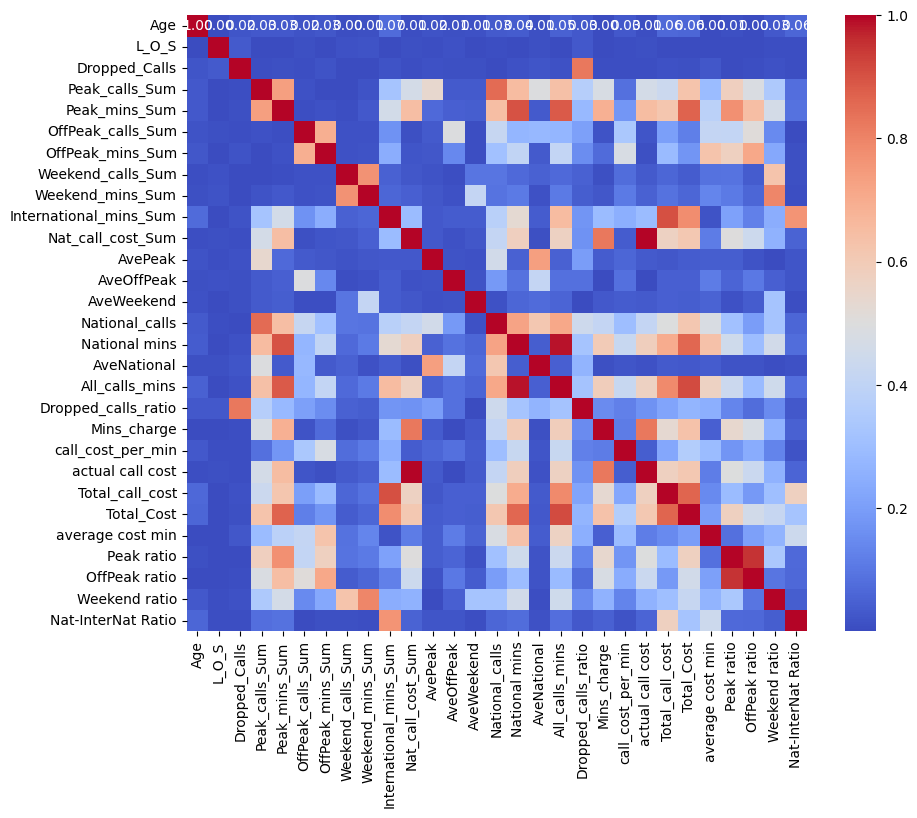

In [25]:
import numpy as np
traindata_yj = pd.DataFrame(traindata_yj)
# Calculate the correlation matrix
correlation_matrix = traindata_yj.corr()
correlation_matrix = correlation_matrix.abs()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [26]:
correlation_matrix = correlation_matrix.stack().reset_index()
correlation_matrix.columns = ['Feature1', 'Feature2', 'Correlation']
correlation_matrix = correlation_matrix[correlation_matrix['Feature1'] != correlation_matrix['Feature2']]
correlation_matrix = correlation_matrix.sort_values(by='Correlation', ascending=False)
correlation_matrix = correlation_matrix[correlation_matrix['Correlation'] > 0.7]
correlation_matrix


,Feature1,Feature2,Correlation
619,actual call cost,Nat_call_cost_Sum,0.996294
311,Nat_call_cost_Sum,actual call cost,0.996294
508,All_calls_mins,National mins,0.987217
452,National mins,All_calls_mins,0.987217
779,OffPeak ratio,Peak ratio,0.949698
751,Peak ratio,OffPeak ratio,0.949698
684,Total_Cost,All_calls_mins,0.910984
516,All_calls_mins,Total_Cost,0.910984
647,Total_call_cost,International_mins_Sum,0.902387
283,International_mins_Sum,Total_call_cost,0.902387


In [27]:
# Specify the correlation threshold
correlation_threshold = 0.7

# Filter the correlation matrix to include only highly correlated pairs
highly_correlated_pairs = correlation_matrix[correlation_matrix['Correlation'] > correlation_threshold]

# Select one feature from each pair to remove
features_to_remove = set()
for index, row in highly_correlated_pairs.iterrows():
    feature1 = row['Feature1']
    feature2 = row['Feature2']
    # Add one of the features to the set of features to remove
    features_to_remove.add(feature2)  # You can choose feature1 or feature2

print(features_to_remove)



{'Weekend_calls_Sum', 'International_mins_Sum', 'Peak_mins_Sum', 'OffPeak ratio', 'Dropped_calls_ratio', 'Peak_calls_Sum', 'actual call cost', 'Weekend_mins_Sum', 'AvePeak', 'Weekend ratio', 'National_calls', 'Peak ratio', 'Total_Cost', 'Dropped_Calls', 'OffPeak_mins_Sum', 'Mins_charge', 'Total_call_cost', 'National mins', 'AveNational', 'Nat-InterNat Ratio', 'All_calls_mins', 'Nat_call_cost_Sum'}


In [28]:
# Drop the selected features from the dataset
df_filtered = df_encoded.drop(columns=features_to_remove)
df_filtered.columns
# matrix_selected_features = filtered_data.columns

Index(['Gender', 'Age', 'Connect_Date', 'L_O_S', 'OffPeak_calls_Sum',
       'AveOffPeak', 'AveWeekend', 'Usage_Band', 'call_cost_per_min',
       'Tariff_OK', 'average cost min', 'high Dropped calls', 'No Usage',
       'tariff_CAT 200', 'tariff_CAT 50', 'tariff_Play 100', 'tariff_Play 300',
       'Handset_ASAD90', 'Handset_BS110', 'Handset_BS210', 'Handset_CAS30',
       'Handset_CAS60', 'Handset_S50', 'Handset_S80', 'Handset_SOP10',
       'Handset_SOP20', 'Handset_WC95'],
      dtype='object')

In [29]:
# add Dropped_calls_ratio to df_filered
df_filtered['Dropped_calls_ratio'] = traindata['Dropped_calls_ratio']

# drop call_cost_per_min and add Total_call_cost
df_filtered = df_filtered.drop(columns=['call_cost_per_min'])
df_filtered['Total_call_cost'] = traindata['Total_call_cost']

df_filtered = df_filtered.drop(columns=['OffPeak_calls_Sum'])
df_filtered['National mins'] = traindata['National mins']


## train test split

In [30]:
# train test split for common dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_filtered, target, test_size=0.2, random_state=42)


## fit model - random forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
#add hyperparameters tuning to the RandomForestClassifier

seed=100
# Define the hyperparameters
param_grid = {
    'n_estimators': [100, 200, 500], #n_estimators: This parameter determines the number of trees in the forest. 
    'max_features': ['auto', 'sqrt', 'log2'], #max_features: This parameter determines the number of features to consider when looking for the best split.
    'bootstrap': [True], #bootstrap: This parameter determines whether bootstrap samples are used when building trees.
    'max_depth': [10, 15, 20], #max_depth: This parameter determines the maximum depth of the tree.
    'random_state': [seed], #random_state: This parameter determines the random number generation for bootstrapping and feature selection.  
    'min_samples_split': [10, 15], #min_samples_split: This parameter determines the minimum number of samples required to split an internal node.
    'min_samples_leaf': [4, 6], #min_samples_leaf: This parameter determines the minimum number of samples required to be at a leaf node.
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, # The model to optimize 
                           param_grid=param_grid, 
cv=5, # Determines the cross-validation splitting strategy
n_jobs=-1, # Number of jobs to run in parallel, -1 means using all processors
verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Create a new RandomForestClassifier with the best parameters
rf_best = RandomForestClassifier(**best_params)

# Fit the new model to the training data pra
rf_best.fit(X_test, y_test)



Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200, random_state=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=100; total time=   0.0s
[CV] EN

/Users/camillecu/Downloads/KUL/AdvancedAnalytic/AAassignments/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
174 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/camillecu/Downloads/KUL/AdvancedAnalytic/AAassignments/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/camillecu/Downloads/KUL/AdvancedAnalytic/AAassignments/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/camillecu/Downloads/KUL/

RandomForestClassifier(max_depth=15, min_samples_leaf=4, min_samples_split=10,
                       random_state=100)

## AUC ROC

ROC AUC: 0.9870960845397349
Accuracy: 0.9326065411298315
Confusion matrix: [[837  19]
 [ 49 104]]


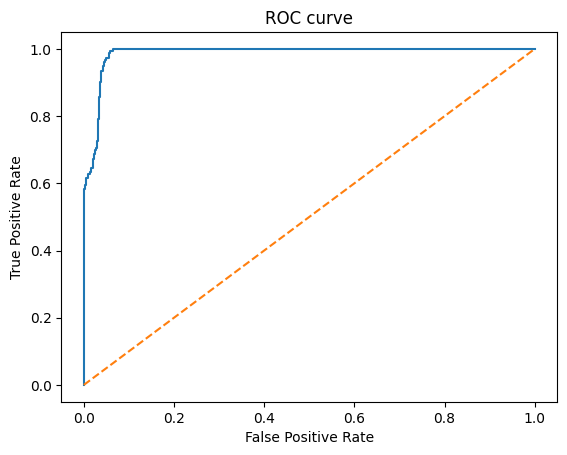

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Predict the test set
y_pred = rf_best.predict(X_test)
y_pred_proba = rf_best.predict_proba(X_test)[:, 1]

# Get the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {roc_auc}')

# Get the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion matrix: {conf_matrix}')


# roc curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()


### Feature Permutation from random forest

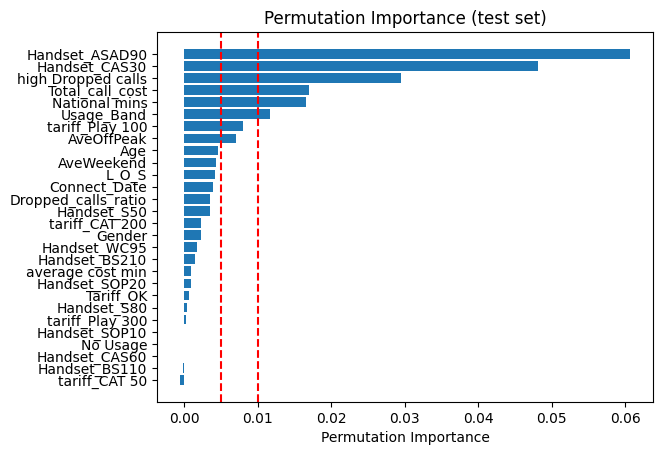

In [33]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Calculate the permutation importance
cor_importance = permutation_importance(rf_best, X_test, y_test, n_repeats=30, random_state=42)

# Get the sorted indices
sorted_idx = cor_importance.importances_mean.argsort()

# Plot the permutation importance
plt.barh(X_test.columns[sorted_idx], cor_importance.importances_mean[sorted_idx])
plt.axvline(x=0.01, color='r', linestyle='--')
plt.axvline(x=0.005, color='r', linestyle='--')
plt.xlabel("Permutation Importance")
plt.title("Permutation Importance (test set)")
plt.show()



# select columns that has a feature importance that is above 0.01 from cor_importance
cor_importance_df = pd.DataFrame(cor_importance.importances_mean, index=X_test.columns, columns=['importance'])
cor_importance_df = cor_importance_df[cor_importance_df['importance'] > 0.005]
cor_importance_df

In [34]:
# select top 14 features 
cor_importance_df = pd.DataFrame(cor_importance.importances_mean, index=X_test.columns, columns=['importance'])
cor_importance_df = cor_importance_df.sort_values(by='importance', ascending=False)
cor_importance_df = cor_importance_df.head(14).index.tolist()
cor_importance_df

['Handset_ASAD90',
 'Handset_CAS30',
 'high Dropped calls',
 'Total_call_cost',
 'National mins',
 'Usage_Band',
 'tariff_Play 100',
 'AveOffPeak',
 'Age',
 'AveWeekend',
 'L_O_S',
 'Connect_Date',
 'Dropped_calls_ratio',
 'Handset_S50']

## random forest with selected features

In [35]:
# drop columns that has a feature importance that is below 0.01 from X_train_cor, X_test_cor

X_train = X_train[cor_importance_df]
X_test = X_test[cor_importance_df]

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
#add hyperparameters tuning to the RandomForestClassifier

seed=100
# Define the hyperparameters
param_grid = {
    'n_estimators': [100, 200, 500], #n_estimators: This parameter determines the number of trees in the forest. 
    'max_features': ['log2'], #max_features: This parameter determines the number of features to consider when looking for the best split.
    'bootstrap': [True], #bootstrap: This parameter determines whether bootstrap samples are used when building trees.
    'max_depth': [20, 30], #max_depth: This parameter determines the maximum depth of the tree.
    'random_state': [seed], #random_state: This parameter determines the random number generation for bootstrapping and feature selection.  
    'min_samples_split': [15, 20], #min_samples_split: This parameter determines the minimum number of samples required to split an internal node.
    'min_samples_leaf': [6, 8], #min_samples_leaf: This parameter determines the minimum number of samples required to be at a leaf node.
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, # The model to optimize 
                           param_grid=param_grid, 
cv=5, # Determines the cross-validation splitting strategy
n_jobs=-1, # Number of jobs to run in parallel, -1 means using all processors
verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Create a new RandomForestClassifier with the best parameters
rf_best = RandomForestClassifier(**best_params)

# Fit the new model to the training data
rf_best.fit(X_test, y_test)



Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=100; total time=   1.4s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=100, random_state=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=6, min_samples_split=15, n_estimators=200, random_state=100; total time=   2.4s
[CV] END

RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=6,
                       min_samples_split=15, n_estimators=200,
                       random_state=100)

ROC AUC: 0.9819192474497587
Accuracy: 0.9187314172447968
Confusion matrix: [[836  20]
 [ 62  91]]


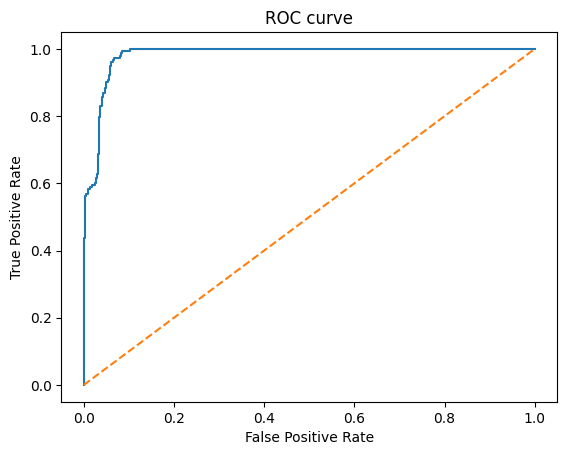

In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Predict the test set
y_pred = rf_best.predict(X_test)
y_pred_proba = rf_best.predict_proba(X_test)[:, 1]

# Get the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC: {roc_auc}')

# Get the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion matrix: {conf_matrix}')


# roc curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()


## test data

In [38]:
test = pd.read_csv('/Users/camillecu/Downloads/KUL/AdvancedAnalytic/AdvancedAnalytics_Assignments/Assignment1/data/test_encoded.csv')
testid = pd.read_csv('/Users/camillecu/Downloads/KUL/AdvancedAnalytic/AdvancedAnalytics_Assignments/Assignment1/data/testid.csv')


In [39]:
test


,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,OffPeak_mins_Sum,Weekend_calls_Sum,...,Handset_ASAD90,Handset_BS110,Handset_BS210,Handset_CAS30,Handset_CAS60,Handset_S50,Handset_S80,Handset_SOP10,Handset_SOP20,Handset_WC95
0,0,-0.897512,146,1.450092,0.510976,1.242784,0.776870,0.233600,-0.516851,-0.327270,...,0,0,0,0,0,0,0,0,0,1
1,0,1.573365,736,-0.108252,-1.147014,-1.119532,-0.585759,0.061548,1.183845,-0.327270,...,0,1,0,0,0,0,0,0,0,0
2,0,-0.100209,1047,-0.498520,-1.147014,2.710504,2.320342,0.029994,-0.731226,-0.174988,...,0,0,0,0,0,0,0,0,0,0
3,0,-0.279347,1075,-0.423497,0.973958,-0.359180,0.643481,0.386556,0.338368,-1.322483,...,0,0,0,0,0,0,0,0,0,1
4,0,0.378486,1034,-0.582365,-1.147014,-0.142794,0.173651,-0.156938,-0.800586,-0.104398,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,0,0.227563,539,0.443916,-1.147014,1.585076,1.335430,-1.153942,-1.485656,1.442271,...,0,1,0,0,0,0,0,0,0,0
1678,1,-1.015415,1094,-0.797517,-1.147014,0.019325,0.063127,-1.498253,-1.246045,-0.949615,...,0,1,0,0,0,0,0,0,0,0
1679,0,0.378486,87,1.434812,-1.147014,1.353658,2.148612,-0.879586,-0.050065,-0.949615,...,0,0,0,0,0,1,0,0,0,0
1680,1,-0.784462,415,0.626585,0.176574,0.272132,-0.492059,-0.122848,-0.479269,-1.643602,...,0,1,0,0,0,0,0,0,0,0


In [40]:
test = test[cor_importance_df]

In [41]:
y_predict = rf_best.predict(test)

In [42]:
result_rf = pd.DataFrame({'id': testid['id'], 'predictions': y_predict})
print(result_rf)

           id  predictions
0     K751808            0
1     K837351            0
2     K548114            0
3     K736156            0
4     K508080            0
...       ...          ...
1677  K588314            0
1678  K826807            0
1679  K982731            0
1680  K623037            0
1681  K883413            0

[1682 rows x 2 columns]


In [43]:
result_rf.to_csv('predictions_rf4.csv', index=False)

# gradient boosting

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
# import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
# Define the parameter grid for XGBoost

param_grid = {
    'n_estimators': [200, 500],
    'max_depth': [10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
}


# Create a XGBoost classifier
xgb_clf = XGBClassifier()

# Create the GridSearchCV object
xgb_model = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

# Fit the GridSearchCV object to the data
xgb_model.fit(X_train, y_train)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.5; total time=   0.9s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.5; total time=   0.9s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.5; total time=   0.9s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.7; total time=   1.0s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=1.0; total time=   1.2s
[

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [10, 20], 'n_estimators': [200, 500],
                         'subsample': [0.5, 0.7, 1.0]},
             verbose=2)

In [45]:
from sklearn.metrics import roc_auc_score
# Predict the target value using the GridSearchCV object and the X_val data
y_pred = xgb_model.predict(X_test)

y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Get the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
roc_auc

0.9069085578156496

## Logistics

In [46]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model with increased number of iterations
logistic_model = LogisticRegression(max_iter=1000)

# Train the model on the scaled training data
logistic_model.fit(X_train, y_train)


/Users/camillecu/Downloads/KUL/AdvancedAnalytic/AAassignments/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict the labels of the validation set: y_pred
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

# Get the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
roc_auc

# Compute and print the confusion matrix and classification report
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

# Compute and print the accuracy
#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy: ", accuracy)


0.8700064137804655

## below is just tryout


## Feature selection - Permutation
we can use Permutation Importance or Random Forest Feature Importance (MDI) to select important features
When features are collinear, permuting one feature has little effect on the models performance because it can get the same information from a correlated feature. Note that this is not the case for all predictive models and depends on their underlying implementation.

One way to handle multicollinear features is by performing hierarchical clustering on the Spearman rank-order correlations, picking a threshold, and keeping a single feature from each cluster.



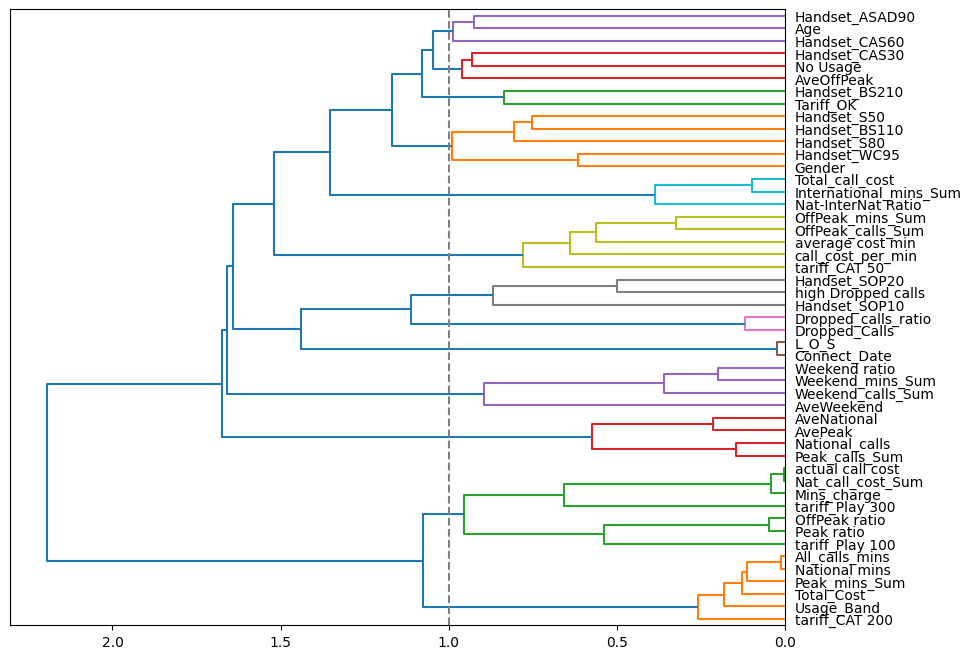

In [48]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from scipy.stats import spearmanr
from numpy import fill_diagonal

# Calculate the Spearman correlation of df_encoded
correlation_matrix = df_encoded.corr(method='spearman')
corr_array = correlation_matrix.to_numpy()

# Ensure the correlation matrix is symmetric
corr = (corr_array + corr_array.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
distance_matrix = 1 - np.abs(corr)
# hierarchical clustering using Ward's linkage.
dist_linkage = hierarchy.ward(squareform(distance_matrix))

plt.figure(figsize=(10, 8))
dendro = hierarchy.dendrogram(dist_linkage, labels=df_encoded.columns, orientation='left', leaf_font_size=10, color_threshold=1)
plt.axvline(x=1, color='gray', linestyle='--')
plt.show()


In [49]:
from collections import defaultdict

cluster_ids = hierarchy.fcluster(dist_linkage, 1, criterion="distance")
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]
selected_features_names = df_encoded.columns[selected_features]
selected_features_names 

Index(['Gender', 'Age', 'Connect_Date', 'Dropped_Calls', 'Peak_calls_Sum',
       'Peak_mins_Sum', 'OffPeak_calls_Sum', 'Weekend_calls_Sum',
       'International_mins_Sum', 'Nat_call_cost_Sum', 'AveOffPeak',
       'Tariff_OK', 'high Dropped calls'],
      dtype='object')

In [50]:
# list the overalpping features and features existing in one group or none between `selected_features` and `matrix_selected_features` in a dataframe table 

overlapping_features = set(selected_features_names).intersection(matrix_selected_features)
overlapping_features

NameError: name 'matrix_selected_features' is not defined

In [ ]:

features_in_selected_features = set(selected_features_names).difference(matrix_selected_features)
features_in_selected_features

{'Connect_Date',
 'International_mins_Sum',
 'Nat_call_cost_Sum',
 'Peak_calls_Sum',
 'Peak_mins_Sum',
 'Weekend_calls_Sum'}

In [ ]:
features_in_matrix_selected_features = set(matrix_selected_features).difference(selected_features_names)
features_in_matrix_selected_features

{'AveNational',
 'AvePeak',
 'AveWeekend',
 'Dropped_calls_ratio',
 'Handset_ASAD90',
 'Handset_BS110',
 'Handset_BS210',
 'Handset_CAS30',
 'Handset_CAS60',
 'Handset_S50',
 'Handset_S80',
 'Handset_SOP10',
 'Handset_SOP20',
 'Handset_WC95',
 'Nat-InterNat Ratio',
 'No Usage',
 'OffPeak_mins_Sum',
 'Weekend ratio',
 'average cost min',
 'call_cost_per_min',
 'tariff_CAT 50',
 'tariff_Play 100',
 'tariff_Play 300'}

## Explore the permutation importance of the selected subset of features:

In [ ]:
common_features = df_encoded[list(overlapping_features)]
perm_features = df_encoded[list(overlapping_features) + list(features_in_selected_features)]
cor_features = df_encoded[list(overlapping_features) + list(features_in_matrix_selected_features)]

common_features = pd.concat([common_features, target], axis=1)
perm_features = pd.concat([perm_features, target], axis=1)
cor_features = pd.concat([cor_features, target], axis=1)

In [ ]:
perm_features

,Age,Gender,AveOffPeak,Tariff_OK,OffPeak_calls_Sum,Dropped_Calls,high Dropped calls,Weekend_calls_Sum,Nat_call_cost_Sum,Connect_Date,Peak_mins_Sum,Peak_calls_Sum,International_mins_Sum,target
0,1.355744,0,-0.472298,1,0.966948,0.310113,0,-0.741518,-0.432222,871,-1.273821,-0.701966,-0.049893,0
1,-0.375707,1,-0.939678,1,0.293697,-0.238286,0,-0.741518,1.098836,351,0.234629,-0.061406,0.767227,1
2,1.139683,0,1.560529,1,-1.478825,-0.238286,0,-1.803759,0.747979,605,-0.671139,0.015918,-0.366922,0
3,1.790840,0,-0.235307,1,-0.192133,-0.238286,0,-1.803759,0.732000,925,-0.687035,-0.491092,-1.374963,0
4,-0.375707,0,-0.731959,1,1.677123,-0.238286,0,-0.470257,-1.123724,1309,-0.710269,-1.517004,-0.414261,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,-1.410185,0,-0.051817,1,1.064039,0.310113,0,1.129161,1.271673,624,0.960709,-0.033183,0.721418,1
5040,-0.017465,0,-0.439887,1,0.529106,-0.238286,0,0.006336,0.502034,272,-0.444087,-0.126114,0.308750,1
5041,-0.573903,1,2.318783,1,-1.693937,-1.376044,0,0.152874,1.822271,1314,2.340468,1.291324,-0.044016,0
5042,1.139683,1,0.869177,1,-0.654606,0.310113,0,-1.118337,-1.123724,734,-1.471837,-0.600245,-0.743871,1


In [ ]:
common_features.isnull().sum()

Age                   0
Gender                0
AveOffPeak            0
Tariff_OK             0
OffPeak_calls_Sum     0
Dropped_Calls         0
high Dropped calls    0
target                0
dtype: int64

In [ ]:
perm_features.isnull().sum()

Age                       0
Gender                    0
AveOffPeak                0
Tariff_OK                 0
OffPeak_calls_Sum         0
Dropped_Calls             0
high Dropped calls        0
Weekend_calls_Sum         0
Nat_call_cost_Sum         0
Connect_Date              0
Peak_mins_Sum             0
Peak_calls_Sum            0
International_mins_Sum    0
target                    0
dtype: int64

In [ ]:
cor_features.isnull().sum()

Age                    0
Gender                 0
AveOffPeak             0
Tariff_OK              0
OffPeak_calls_Sum      0
Dropped_Calls          0
high Dropped calls     0
call_cost_per_min      0
Handset_BS110          0
AveWeekend             0
Handset_SOP10          0
Nat-InterNat Ratio     0
AveNational            0
Handset_BS210          0
Dropped_calls_ratio    0
Handset_WC95           0
Handset_ASAD90         0
No Usage               0
Handset_CAS60          0
Handset_SOP20          0
AvePeak                0
tariff_CAT 50          0
Weekend ratio          0
average cost min       0
tariff_Play 100        0
Handset_S80            0
Handset_CAS30          0
OffPeak_mins_Sum       0
Handset_S50            0
tariff_Play 300        0
target                 0
dtype: int64

In [ ]:

common_features.to_csv('/Users/camillecu/Downloads/KUL/AdvancedAnalytic/AdvancedAnalytics_Assignments/Assignment1/data/common.csv', index=False)
perm_features.to_csv('/Users/camillecu/Downloads/KUL/AdvancedAnalytic/AdvancedAnalytics_Assignments/Assignment1/data/perm.csv', index=False)
cor_features.to_csv('/Users/camillecu/Downloads/KUL/AdvancedAnalytic/AdvancedAnalytics_Assignments/Assignment1/data/cor.csv', index=False)
